In [7]:
# Import the required libraries: Pandas, Numpy, Matplotlib and  Seaborn

import pandas as pd  # For data munging, manipulations and preparation        
import numpy as np  # for numerical and mathematical calculations
import seaborn as sns # For statistical data visualization
import matplotlib.pyplot as plt  # For plotting variety of graphs(histograms, heatplots, lineplots
%matplotlib inline
import warnings                   # To ignore the warnings
warnings.filterwarnings("ignore")

In [9]:
import sys
import os

In [11]:
# Let us load and read the data from the csv file then print the top 10 rows  to understand the various data columns.

df=pd.read_csv("Admission_Predict.csv")
df.head(10)

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
5,6,330,115,5,4.5,3.0,9.34,1,0.90
6,7,321,109,3,3.0,4.0,8.20,1,0.75
7,8,308,101,2,3.0,4.0,7.90,0,0.68
8,9,302,102,1,2.0,1.5,8.00,0,0.50
9,10,323,108,3,3.5,3.0,8.60,0,0.45


In [12]:
# Check the instances(rows) and attributes(columns) in the dataset: Size and Dimension of the dataframe
df.shape
print("DataFrame Dimenisons:", df.shape)

DataFrame Dimenisons: (400, 9)


In [13]:
# Checking the Column types and Count value

ctype = df.dtypes.reset_index()
ctype.columns = ["Count", "Column Type"]
ctype.groupby("Column Type").aggregate('count').reset_index()

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
Serial No.           400 non-null int64
GRE Score            400 non-null int64
TOEFL Score          400 non-null int64
University Rating    400 non-null int64
SOP                  400 non-null float64
LOR                  400 non-null float64
CGPA                 400 non-null float64
Research             400 non-null int64
Chance of Admit      400 non-null float64
dtypes: float64(4), int64(5)
memory usage: 28.2 KB


In [7]:
# Checking the  Missing Values

missing_df = df.isnull().sum(axis=0).reset_index()
missing_df.columns = ['Column_Name', 'Missing_Count']
missing_df = missing_df[missing_df['Missing_Count']>0]
missing_df = missing_df.sort_values(by='Missing_Count')
missing_df

,Column_Name,Missing_Count


As seen above, there are no missing ( null ) values in this dataframe

In [8]:
# Renaming the columns to make our lives easy

df.columns.to_frame().T

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit


In [9]:
## Method to display the columns in the data set

df.count().to_frame().T

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,400,400,400,400,400,400,400,400,400


Above method can be used to find out the rows of values in the data set.

In [10]:

print("There are",len(df.columns),"Columns:")
for x in df.columns:
    sys.stdout.write(str(x)+", ")                                                      #admt.columns also works 

There are 9 Columns:
Serial No., GRE Score, TOEFL Score, University Rating, SOP, LOR , CGPA, Research, Chance of Admit , 

Looking at the column names we can see that we can make the names of the colums shorter.

In [38]:
# Renaming the Columns

df.rename(columns={'Serial No.':'Srno','GRE Score':'GRE','TOEFL Score':'TOEFL','University Rating':'UnivRating','Chance of Admit ':'Chance'},inplace=True)

In [39]:
df.head(2)

,GRE,TOEFL,UnivRating,SOP,LOR,CGPA,Research,Chance
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76


We can see that the name of the columns have be changed as per our convience.We can see that first column is serial number it will not have any effect on the chance of admission to the University.We better drop the column of serial number from the data set.

In [14]:
df.columns

Index(['Srno', 'GRE', 'TOEFL', 'UnivRating', 'SOP', 'LOR ', 'CGPA', 'Research',
       'Chance'],
      dtype='object')

In [15]:
# Drop Column

df.drop('Srno', axis=1, inplace=True)
df.head()

,GRE,TOEFL,UnivRating,SOP,LOR,CGPA,Research,Chance
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


We can see that the column for serial number is droped or removed from the dataset.

### Lets explore the data

Text(0.5, 1.0, 'General Statistics of Admissions')

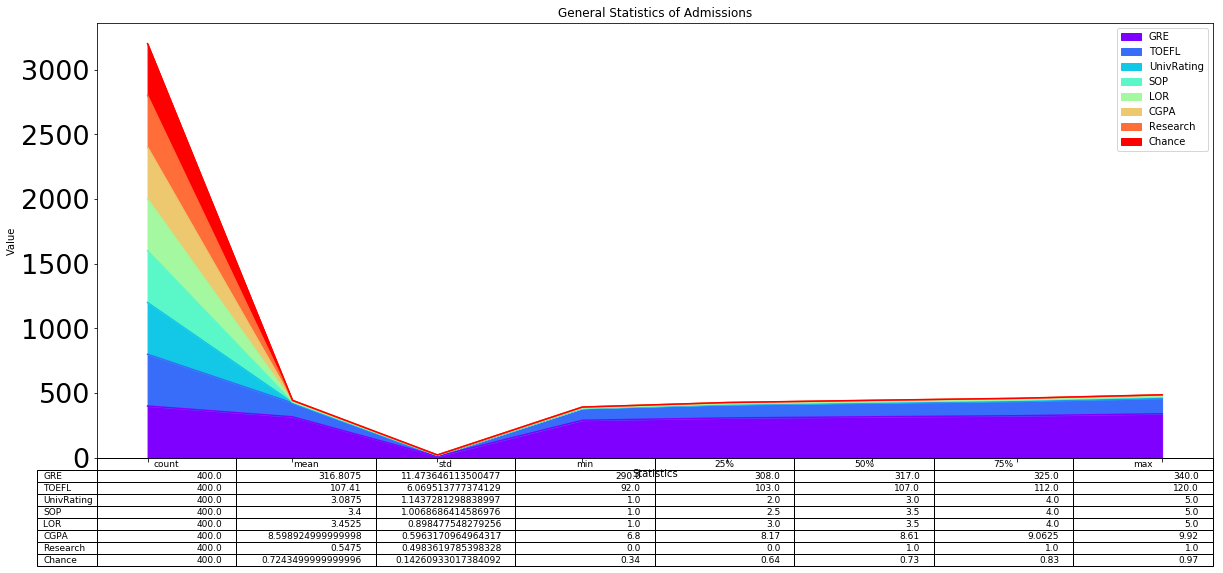

In [20]:
df.describe().plot(kind = "area",fontsize=27, figsize = (20,8), table = True,colormap="rainbow")
plt.xlabel('Statistics',)
plt.ylabel('Value')
plt.title("General Statistics of Admissions")

We can display describe function in pictorial way.In most cases the describle table is sufficient for us the get valuable information about the data.

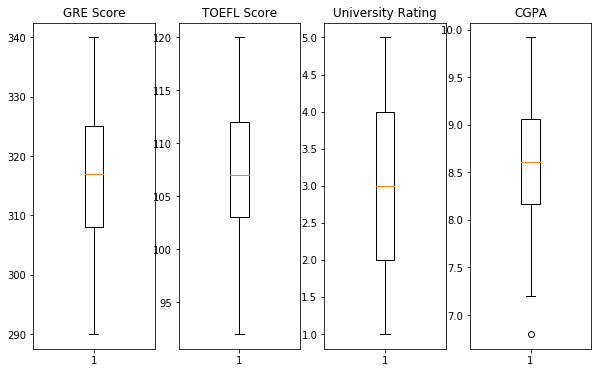

In [40]:
plt.figure(1, figsize=(10,6))
plt.subplot(1,4, 1)
plt.boxplot(df['GRE'])
plt.title('GRE Score')

plt.subplot(1,4,2)
plt.boxplot(df['TOEFL'])
plt.title('TOEFL Score')

plt.subplot(1,4,3)
plt.boxplot(df['UnivRating'])
plt.title('University Rating')

plt.subplot(1,4,4)
plt.boxplot(df['CGPA'])
plt.title('CGPA')

plt.show()

Above box plot shows us the min,median and max values for GRE,TOEFL,University rating and CGPA for the dataset.

#### Finding out correlations between the features and the chance of admission to the university

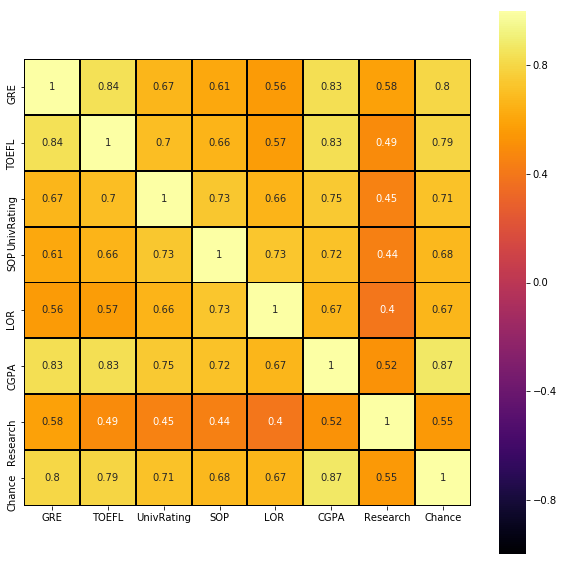

In [41]:
fig=plt.gcf()
fig.set_size_inches(10,10)
fig=sns.heatmap(df.corr(),annot=True,cmap='inferno',linewidths=1,linecolor='k',square=True,mask=False, vmin=-1, vmax=1,cbar_kws={"orientation": "vertical"},cbar=True)


Heat map gives a good pictorial representation of the correlation of features to our target value chance of admit to university.Looking at the heat map to get the correlation can sometimes be condusing.One way out would be the to get the correlation values against target(Chance) as shown below.

In [42]:
#correlations_data = admt.corr()['Chance'].sort_values(ascending=False)
cor=df.corr()['Chance']
# Print the correlations
print(cor)

GRE           0.802610
TOEFL         0.791594
UnivRating    0.711250
SOP           0.675732
LOR           0.669889
CGPA          0.873289
Research      0.553202
Chance        1.000000
Name: Chance, dtype: float64


We can see that CGPA,GRE,TOEFL,University Ranking has the highest correlation with the chance of admission to the university.The other parameters like SOP,LOR and Research has less impact on the chance of admission.We can dropt he column Srno from our dataframe as it doesnt have any impact on the chance of admission.

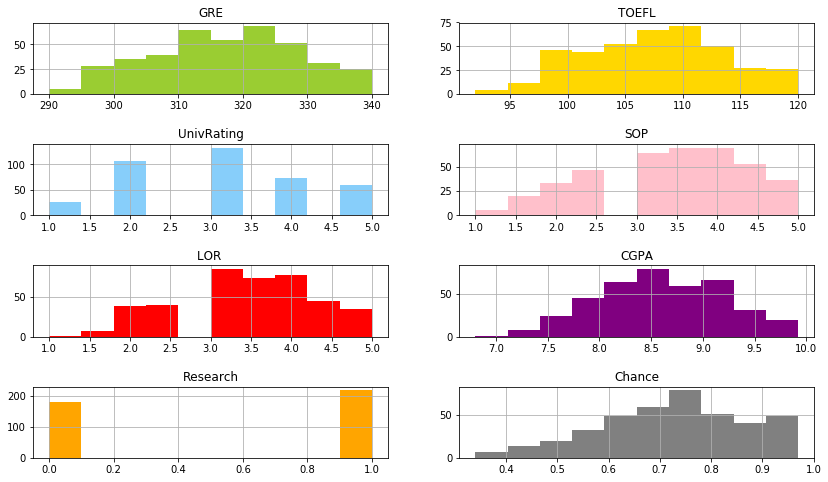

In [43]:
category = ['GRE','TOEFL','UnivRating','SOP','LOR ','CGPA','Research','Chance']
color = ['yellowgreen','gold','lightskyblue','pink','red','purple','orange','gray']
start = True
for i in np.arange(4):
    
    if start == True:
        fig = plt.figure(figsize=(14,8))
        start = False
        
    plt.subplot2grid((4,2),(i,0))
    df[category[2*i]].hist(color=color[2*i],bins=10)
    plt.title(category[2*i])
    plt.subplot2grid((4,2),(i,1))
    df[category[2*i+1]].hist(color=color[2*i+1],bins=10)
    plt.title(category[2*i+1])
    
plt.subplots_adjust(hspace = 0.7, wspace = 0.2)    
plt.show()

In [44]:
print('Mean CGPA Score is :',int(df[df['CGPA']<=500].CGPA.mean()))
print('Mean GRE Score is :',int(df[df['GRE']<=500].GRE.mean()))
print('Mean TOEFL Score is :',int(df[df['TOEFL']<=500].TOEFL.mean()))
print('Mean University rating is :',int(df[df['UnivRating']<=500].UnivRating.mean()))

Mean CGPA Score is : 8
Mean GRE Score is : 316
Mean TOEFL Score is : 107
Mean University rating is : 3


Target of an aspirant would be get more than the mean scores displayed above.

#### How important is Research to get an Admission?

In [45]:
a=len(df[df.Research==1])
b=len(df[df.Research==0])
print('Total number of students',a+b)
print('Students having Research:',len(df[df.Research==1]))
print('Students not having Research:',len(df[df.Research==0]))

Total number of students 400
Students having Research: 219
Students not having Research: 181


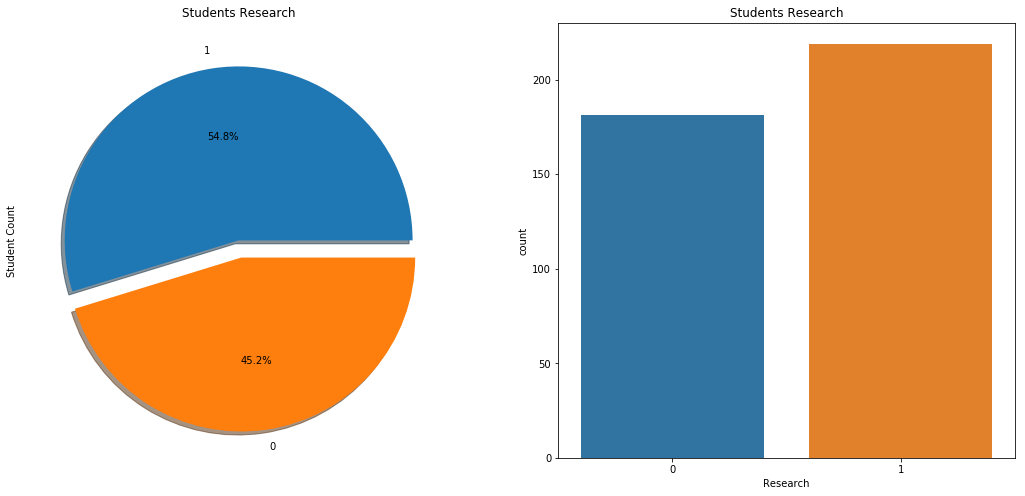

In [46]:
f,ax=plt.subplots(1,2,figsize=(18,8))
df['Research'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Students Research')
ax[0].set_ylabel('Student Count')
sns.countplot('Research',data=df,ax=ax[1])
ax[1].set_title('Students Research')
plt.show()

We can see that 55% Students have done Research.It possible only the better student could get a chance for doing research.Doing research does add practical knowledge and increases the student skill of working with groups or teams.

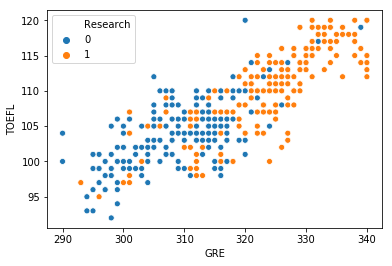

In [47]:
sns.scatterplot(data=df,x='GRE',y='TOEFL',hue='Research')

We can see that stutents who have done research do have good TOEFL and GRE Score.

### Chance of admission

We are assuming here that students with 0.7 chance of admission have secured admission.We create another column in oour dataset named Admit.The value of Admit=1 if Chance>0.7 and Admit=0 if Chance<0.7.



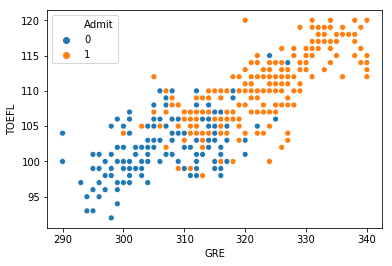

In [48]:
def modiffy(row):
    if row['Chance'] >0.7 :
        return 1
    else :
        return 0
df['Admit'] = df.apply(modiffy,axis=1)
admttemp = df.drop(['Chance'], axis=1)
#sns.pairplot(admttemp,hue='Admit')
sns.scatterplot(data=admttemp,x='GRE',y='TOEFL',hue='Admit')
del admttemp

We can clearly see that students with higher GRE and TOEFL scores have very high chance of getting an university admission

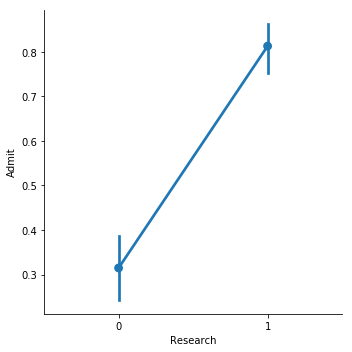

In [49]:
sns.factorplot('Research','Admit',data=df)
plt.show()

Yes your chance of Admission increases if you do Research.

### What should be your Scores for 0.9 % Chance of Admission?

In [50]:
df_sort=df.sort_values(by=df.columns[-1],ascending=False)
df_sort.head()

#df.head()
#dftemp.head()


,GRE,TOEFL,UnivRating,SOP,LOR,CGPA,Research,Chance,Admit
0,337,118,4,4.5,4.5,9.65,1,0.92,1
222,324,113,4,4.5,4.0,8.79,0,0.76,1
235,326,111,5,4.5,4.0,9.23,1,0.88,1
234,330,113,5,5.0,4.0,9.31,1,0.91,1
231,319,106,3,3.5,2.5,8.33,1,0.74,1


We can see that the maximum Chance of admission is 0.97.Lets find out the scores needed for 90 % chance of admission.



In [51]:
df_sort[(df_sort['Chance']>0.90)].mean().reset_index()

,index,0
0,GRE,333.612245
1,TOEFL,116.285714
2,UnivRating,4.653061
3,SOP,4.561224
4,LOR,4.479592
5,CGPA,9.536939
6,Research,1.000000
7,Chance,0.937551
8,Admit,1.000000


For having a 90% Chance to get admission one should have GRE=333.61,TOEFL=116.28,CGPA=9.53 .If you get scores more than this then your chances of admission are very good.

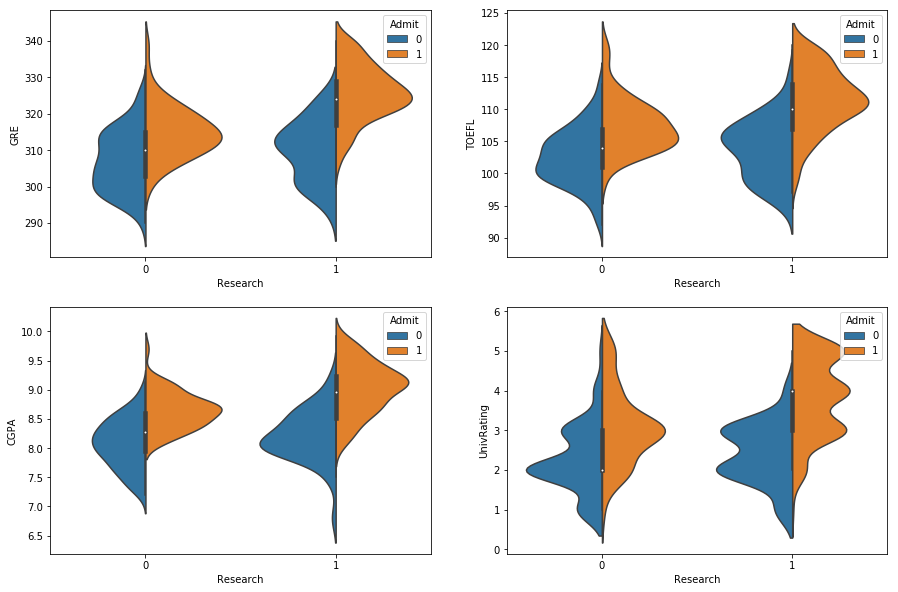

In [52]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.violinplot("Research","GRE",hue="Admit", data=df,split=True)
plt.subplot(2,2,2)
sns.violinplot("Research","TOEFL",hue="Admit", data=df,split=True)
plt.subplot(2,2,3)
sns.violinplot("Research","CGPA",hue="Admit", data=df,split=True)
plt.subplot(2,2,4)
sns.violinplot("Research","UnivRating",hue="Admit", data=df,split=True)
#ax[0].set_title('Pclass and Age vs Survived')
#ax[0].set_yticks(range(0,110,10))
#sns.violinplot("Sex","Age", hue="Survived", data=data,split=True,ax=ax[1])
#ax[1].set_title('Sex and Age vs Survived')
#ax[1].set_yticks(range(0,110,10))
plt.ioff()
plt.show()

We can clearly see that the student with research have higher chance of admission and their overall all GRE,TOEFL and CPGA scores are also high.

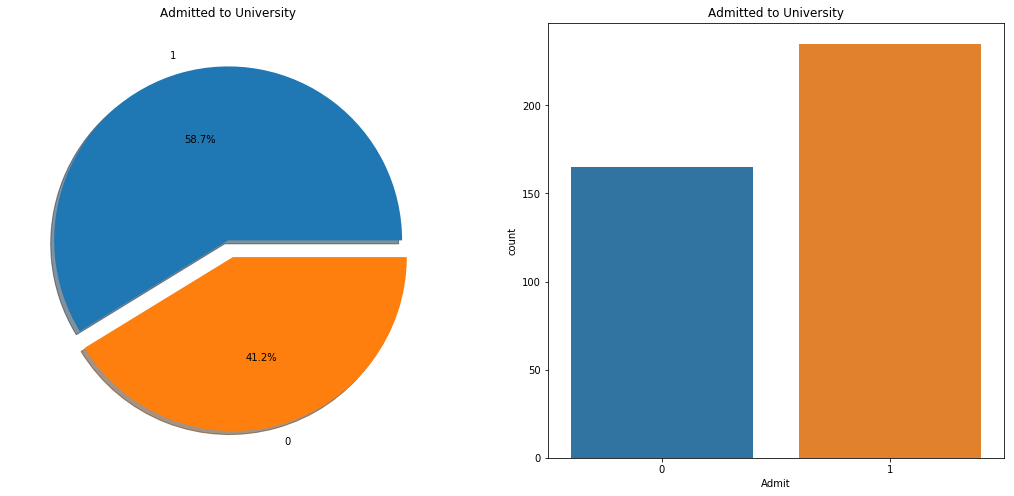

In [53]:
f,ax=plt.subplots(1,2,figsize=(18,8))
df['Admit'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Admitted to University')
ax[0].set_ylabel('')
sns.countplot('Admit',data=df,ax=ax[1])
ax[1].set_title('Admitted to University')
plt.show()

We can see that 59% of the student have high chance of Admission.

#### Lets start with machine learning

In [54]:
df.head(3)

,GRE,TOEFL,UnivRating,SOP,LOR,CGPA,Research,Chance,Admit
0,337,118,4,4.5,4.5,9.65,1,0.92,1
1,324,107,4,4.0,4.5,8.87,1,0.76,1
2,316,104,3,3.0,3.5,8.00,1,0.72,1


In [55]:
X=df.iloc[:,:-2].values
X[0]

array([337.  , 118.  ,   4.  ,   4.5 ,   4.5 ,   9.65,   1.  ])

In [23]:
y=df.iloc[:,-2].values # or we can use y=data.iloc[:,3].values
y[0]


1

### Splitting the data into training and test data using test size of 0.05

In [24]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.05,random_state=0)

###  1.Linear regression

In [25]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
reg=linear_model.LinearRegression()
reg.fit(X_train,y_train)
pred1=reg.predict(X_test)
print("Mean Squared Error: ",mean_squared_error(y_test,pred1))
#('Accuracy for Linear Regression is ',metrics.accuracy_score(y_pred,y_test))

Mean Squared Error:  0.13685514932213386


The test values from the dataset are :

In [ ]:
y_test

The Values predicted by Linear regression are :

In [26]:
pred1

array([ 0.45190297,  0.37140841,  0.74357977,  0.27329782,  0.53580943,
        0.37152569,  0.41680287,  0.47390464,  0.87111919,  0.92456187,
       -0.00463939,  0.96520398,  0.61708099,  0.11316209,  0.8478063 ,
        0.32395962,  0.45599017,  0.8164831 ,  0.52538835,  0.52930825])

Predicting the chance for a use case.We give the input to the algorithm in the form of a list as shown below.

In [56]:
Score=['337','118','4','4.5','4.5','9.65','1']
Score=pd.DataFrame(Score).T
chance=reg.predict(Score)
chance

ValueError: shapes (1,7) and (6,) not aligned: 7 (dim 1) != 6 (dim 0)

So the algrothim predicts the value as 0.95 against the actual value 0.92

Pictorial representation of correlation between the actual and predicted values

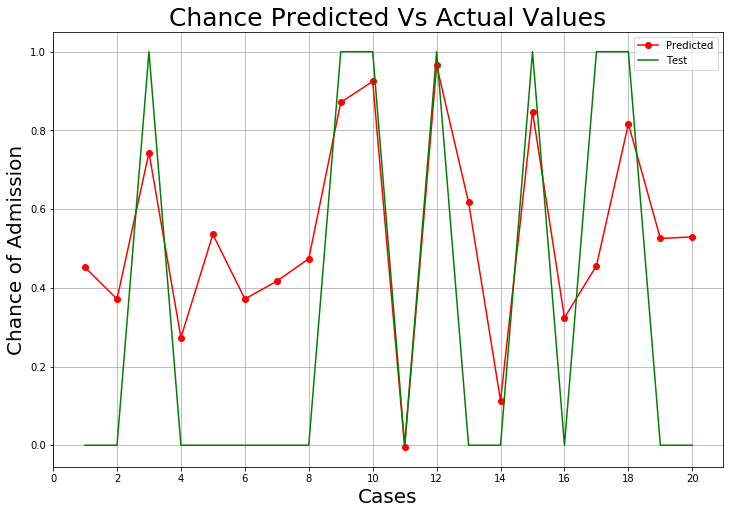

In [28]:
plt.figure(figsize=(12,8))
y=pred1
y1=y_test
x=np.arange(1, 21, 1)
x1=np.arange(0,21,2)
plt.plot(x,y,color='r',marker='o',label='Predicted')
plt.plot(x,y1,color='g',label='Actual')
plt.xticks(x1)
plt.gca().legend(('Predicted','Test'))
plt.xlabel('Cases',fontsize=20)
plt.ylabel('Chance of Admission',fontsize=20)
plt.title('Chance Predicted Vs Actual Values',fontsize=25)
plt.grid()
plt.ioff()

We can see from the above plot that we have fairly good correlation.

### 2.Decision Tree

In [31]:
df.head()

,GRE,TOEFL,UnivRating,SOP,LOR,CGPA,Research,Chance
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


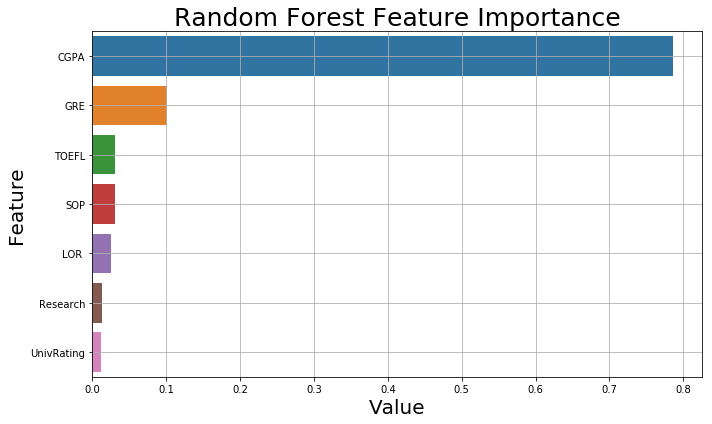

In [57]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators = 1000,random_state = 123)
columns = ['Admit']
df.drop(columns, inplace=True, axis=1)
X = df.drop('Chance',axis = 1)
y = df['Chance']
X_train,X_val,y_train,y_val = train_test_split(X,y,test_size = .25,random_state = 123)
rf_model = RandomForestRegressor(n_estimators = 1000,random_state = 123)
rf_model.fit(X_train,y_train)
feature_importance = pd.DataFrame(sorted(zip(rf_model.feature_importances_, X.columns)), columns=['Value','Feature'])
plt.figure(figsize=(10, 6))
sns.barplot(x="Value", y="Feature", data=feature_importance.sort_values(by="Value", ascending=False))
plt.xlabel('Value',fontsize=20)
plt.ylabel('Feature',fontsize=20)
plt.title('Random Forest Feature Importance',fontsize=25)
plt.grid()
plt.ioff()
plt.tight_layout()

We can see CGPA,GRE,TOEFL and SOP arte most important features in the data set.

 ### 3.Logistic Regression:
 
 It is used to predict binary results.In this case we have crerated the column Admit which tells us detail of Whether the candidate has got admission(1) or not (0).We have seen from the decision tree algorithm that CGPA and the GRE Score has the highest influence on the chance of admission.So while making a Logistic Regression we will use the values of CGPA and GRE score to predict the Admission to the University

 ### 3.1 Generating Array of Features and Target Values

In [58]:
df.head()

,GRE,TOEFL,UnivRating,SOP,LOR,CGPA,Research,Chance
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [59]:
X=df_sort.iloc[:,[0,5]].values    # O represents GRE Score and 5 represnts CGPA 
y=df_sort.iloc[:,8].values        # 8 tells us if the Candidate got Admission or not 

In [60]:
from sklearn import preprocessing
lab_enc = preprocessing.LabelEncoder()
Y = lab_enc.fit_transform(y)

### 3.2 Splitting the dataset to Train and Test Set

In [61]:
from sklearn.model_selection import train_test_split   #cross_validation doesnt work any more
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=0) 
#y_train

### 3.3 Feature Scaling

In [62]:
from sklearn.preprocessing import StandardScaler 
sc_X=StandardScaler()
X_train=sc_X.fit_transform(X_train)
X_test=sc_X.fit_transform(X_test)
#X_train

### 3.4 Fitting Logistic Regression into Training set

In [63]:
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression(random_state=0)
classifier.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=0, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

### 3.5 Predicting the test set results

In [64]:
y_pred=classifier.predict(X_test)

### 3.6 Making the confusion matrix

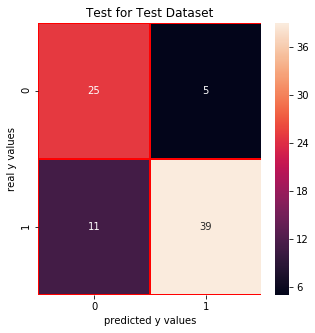

In [65]:
from sklearn.metrics import confusion_matrix  #Class has capital at the begining function starts with small letters 
cm=confusion_matrix(y_test,y_pred)
import seaborn as sns
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.title("Test for Test Dataset")
plt.xlabel("predicted y values")
plt.ylabel("real y values")
plt.show()


Correct predictions =28+39=64

Wrong predictions =6+7=13

Accuracy =(64/77)*100 =83.11 %



## 3.7 Visualizing the Training Set Results

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


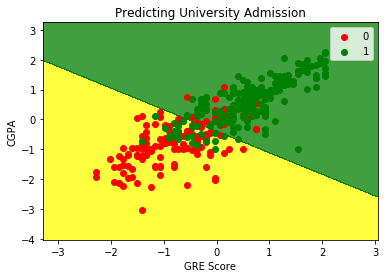

In [66]:
from matplotlib.colors import ListedColormap
X_set,y_set=X_train,y_train
X1,X2=np.meshgrid(np.arange(start=X_set[:,0].min()-1,stop=X_set[:,0].max()+1,step=0.01),
                 np.arange(start=X_set[:,1].min()-1,stop=X_set[:,1].max()+1,step=0.01))
plt.contourf(X1,X2,classifier.predict(np.array([X1.ravel(),X2.ravel()]).T).reshape(X1.shape),
            alpha=0.75,cmap=ListedColormap(('yellow','green')))
plt.xlim(X1.min(),X1.max())
plt.ylim(X2.min(),X2.max())
for i,j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set==j,0],X_set[y_set==j,1],
               c=ListedColormap(('red','green'))(i),label=j)
plt.title('Predicting University Admission')
plt.xlabel('GRE Score')
plt.ylabel('CGPA')
plt.legend()
plt.show()


###  3.8 Visualizing the Test Set Results

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


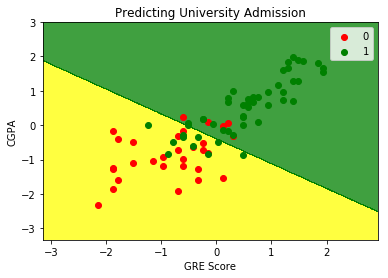

In [67]:
from matplotlib.colors import ListedColormap
X_set,y_set=X_test,y_test
X1,X2=np.meshgrid(np.arange(start=X_set[:,0].min()-1,stop=X_set[:,0].max()+1,step=0.01),
                 np.arange(start=X_set[:,1].min()-1,stop=X_set[:,1].max()+1,step=0.01))
plt.contourf(X1,X2,classifier.predict(np.array([X1.ravel(),X2.ravel()]).T).reshape(X1.shape),
            alpha=0.75,cmap=ListedColormap(('yellow','green')))
plt.xlim(X1.min(),X1.max())
plt.ylim(X2.min(),X2.max())
for i,j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set==j,0],X_set[y_set==j,1],
               c=ListedColormap(('red','green'))(i),label=j)
plt.title('Predicting University Admission')
plt.xlabel('GRE Score')
plt.ylabel('CGPA')
plt.legend()
plt.show()

The Yellow region is the area of people who failed to get admission.Red dots represent the students who failed to get admission. Green Dotd and Green Area represent the people who Managed to get admission.

0-Not Admitted

1-Admitted

##### 4. K Means Clustering: K 

means is an unsupervised clustering algorithm.We use it here to see how the students will be getting clustered based on their GRE and CGPA Scores.

### 4.1 Generating the Array of Features

In [69]:
X=df_sort.iloc[:,[0,5]].values 
#X

#### 4.2 Using Elbow method to find the optiminal cluster number

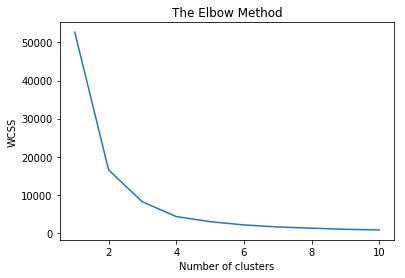

In [70]:
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

From the Elbow plot we can see that four could be the optiminal number of cluster for this analysis.

### 4.3. Applying K means to the Dataset

In [71]:
kmeans=KMeans(n_clusters=4,init='k-means++',max_iter=300,n_init=10,random_state=0)
y_kmeans=kmeans.fit_predict(X)

### 4.4 Visualizing the clusters

<function matplotlib.pyplot.show(*args, **kw)>

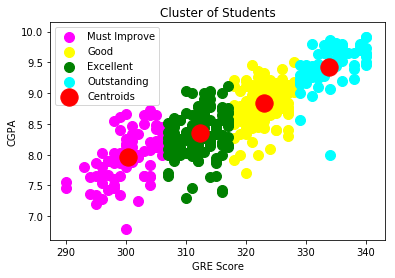

In [72]:
plt.scatter(X[y_kmeans==0,0],X[y_kmeans==0,1],s=100,c='magenta',label='Must Improve') 
plt.scatter(X[y_kmeans==1,0],X[y_kmeans==1,1],s=100,c='yellow',label='Good')  
plt.scatter(X[y_kmeans==2,0],X[y_kmeans==2,1],s=100,c='green',label='Excellent')   
plt.scatter(X[y_kmeans==3,0],X[y_kmeans==3,1],s=100,c='cyan',label='Outstanding')  
#plt.scatter(X[y_kmeans==4,0],X[y_kmeans==4,1],s=100,c='burlywood',label='Sensible')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=300,c='red',label='Centroids')
plt.title('Cluster of Students')
plt.xlabel('GRE Score')
plt.ylabel('CGPA')
plt.legend()
plt.show

Based on the cluster I have catogerised the students into four catogeries.

1.Outstanding - GRE> 327 + and CGPA > 8.5

2.Ecxcellent -GRE> 317 + and CGPA > 7.7

3.Good -GRE> 306 + and CGPA > 7.3

4.Must Improve -GRE> 290 + and CGPA > 6.7